# K Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mall_customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df = data.iloc[:, [3,4]]

In [6]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
df.shape

(200, 2)

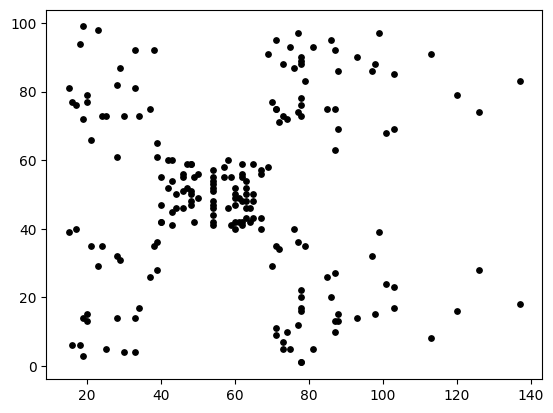

In [8]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], s=15, c= "black")

In [9]:
from sklearn.cluster import KMeans

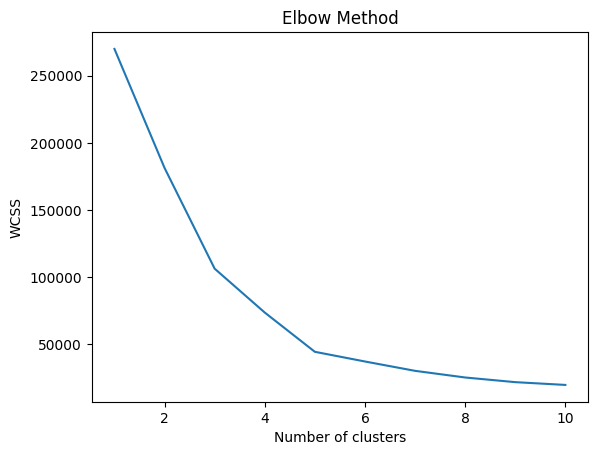

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = "k-means++", 
                   max_iter= 300, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=5, init= "k-means++",
               max_iter= 300, n_init=10)
labels = kmeans.fit_predict(df)

In [12]:
np.unique(labels)

array([0, 1, 2, 3, 4])

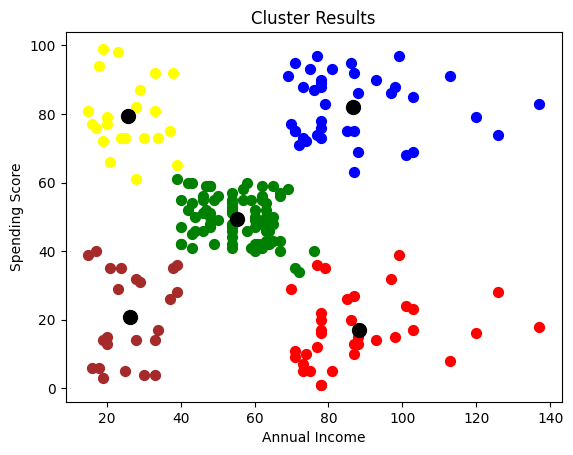

In [13]:
plt.scatter(df.iloc[labels==0,0], df.iloc[labels==0,1], s=50, c= "red")
plt.scatter(df.iloc[labels==1,0], df.iloc[labels==1,1], s=50, c= "blue")
plt.scatter(df.iloc[labels==2,0], df.iloc[labels==2,1], s=50, c= "green")
plt.scatter(df.iloc[labels==3,0], df.iloc[labels==3,1], s=50, c= "yellow")
plt.scatter(df.iloc[labels==4,0], df.iloc[labels==4,1], s=50, c= "brown")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c= "black")
plt.title("Cluster Results")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()